# Intersavy Data Science Internship

# Task 1 Graduate Admission


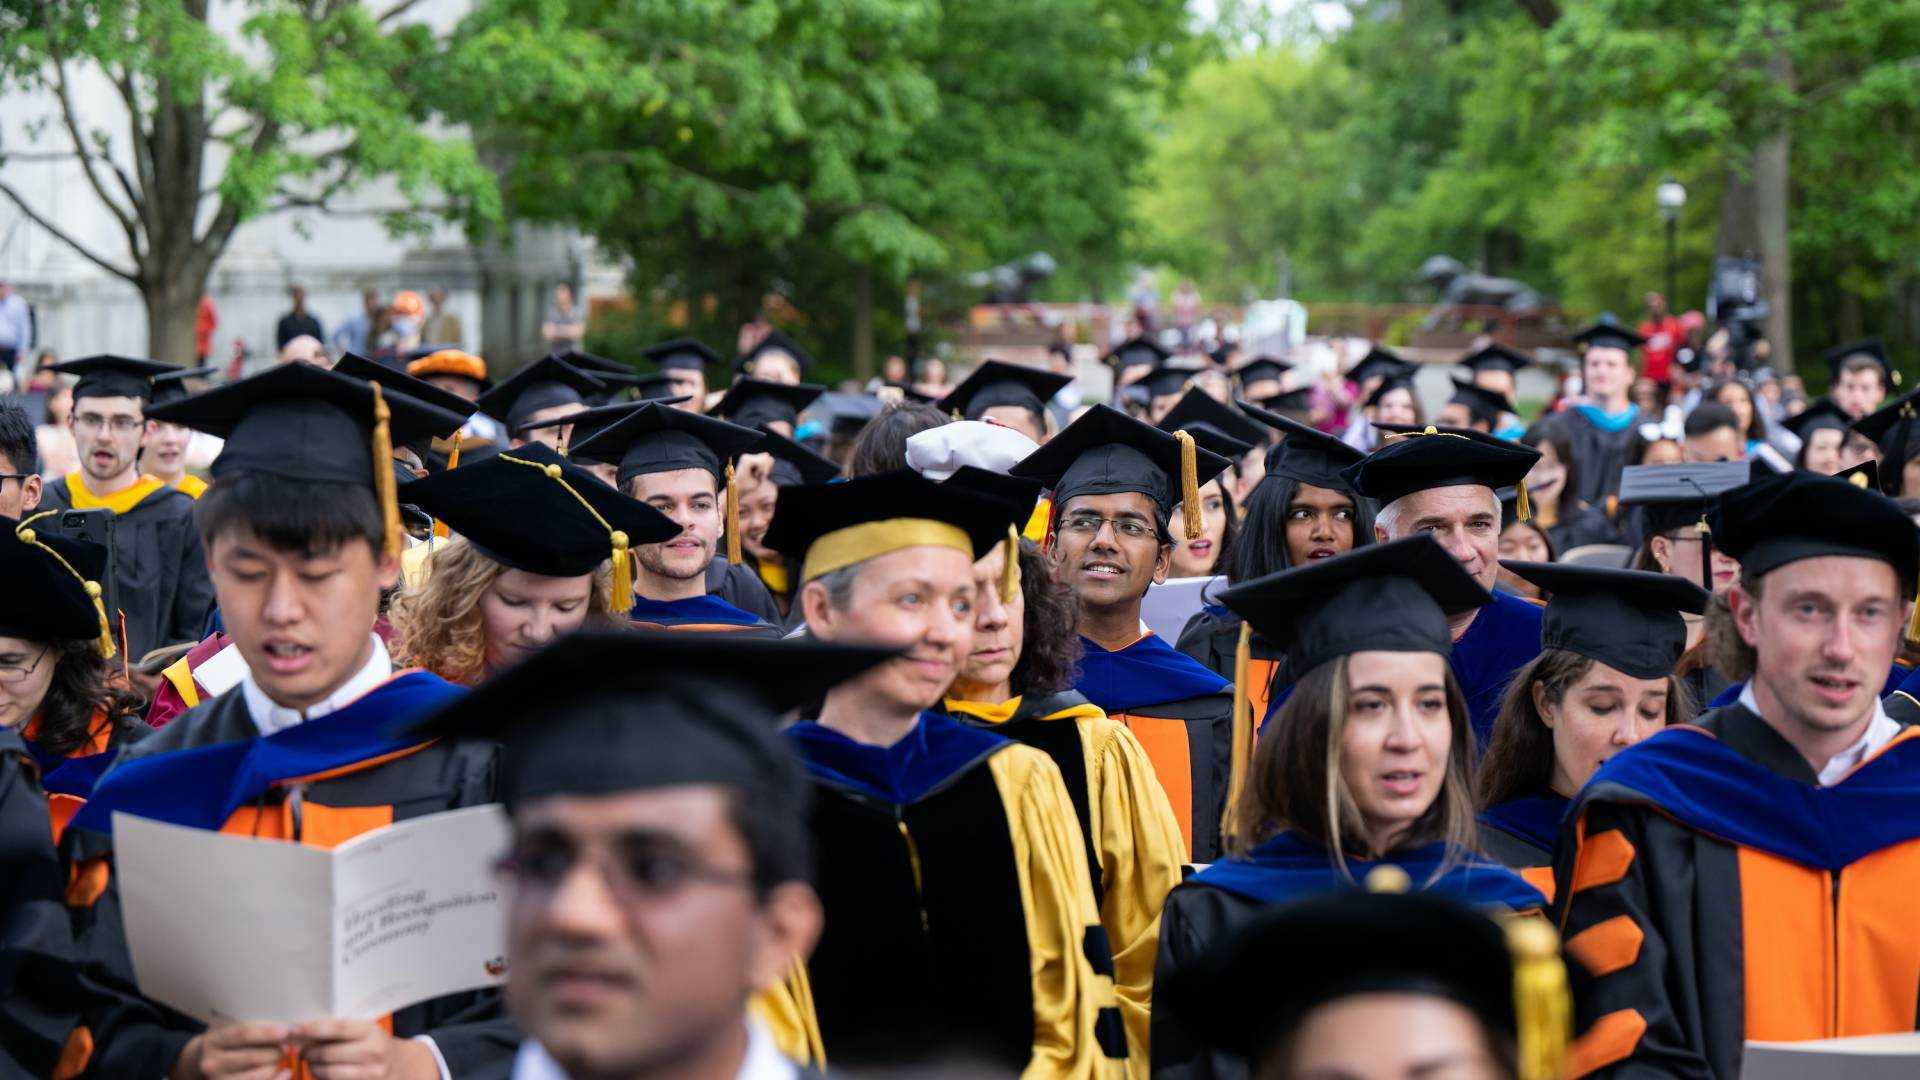# 

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score,confusion_matrix,mean_absolute_error,mean_squared_error,classification_report
%matplotlib inline

In [59]:
df=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict.csv')

In [60]:
df1=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict.csv')

In [61]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [62]:
df1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [63]:
df.shape

(400, 9)

In [64]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [65]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


**Visualizations**

In [67]:
df=df.drop(['Serial No.'],axis=1)

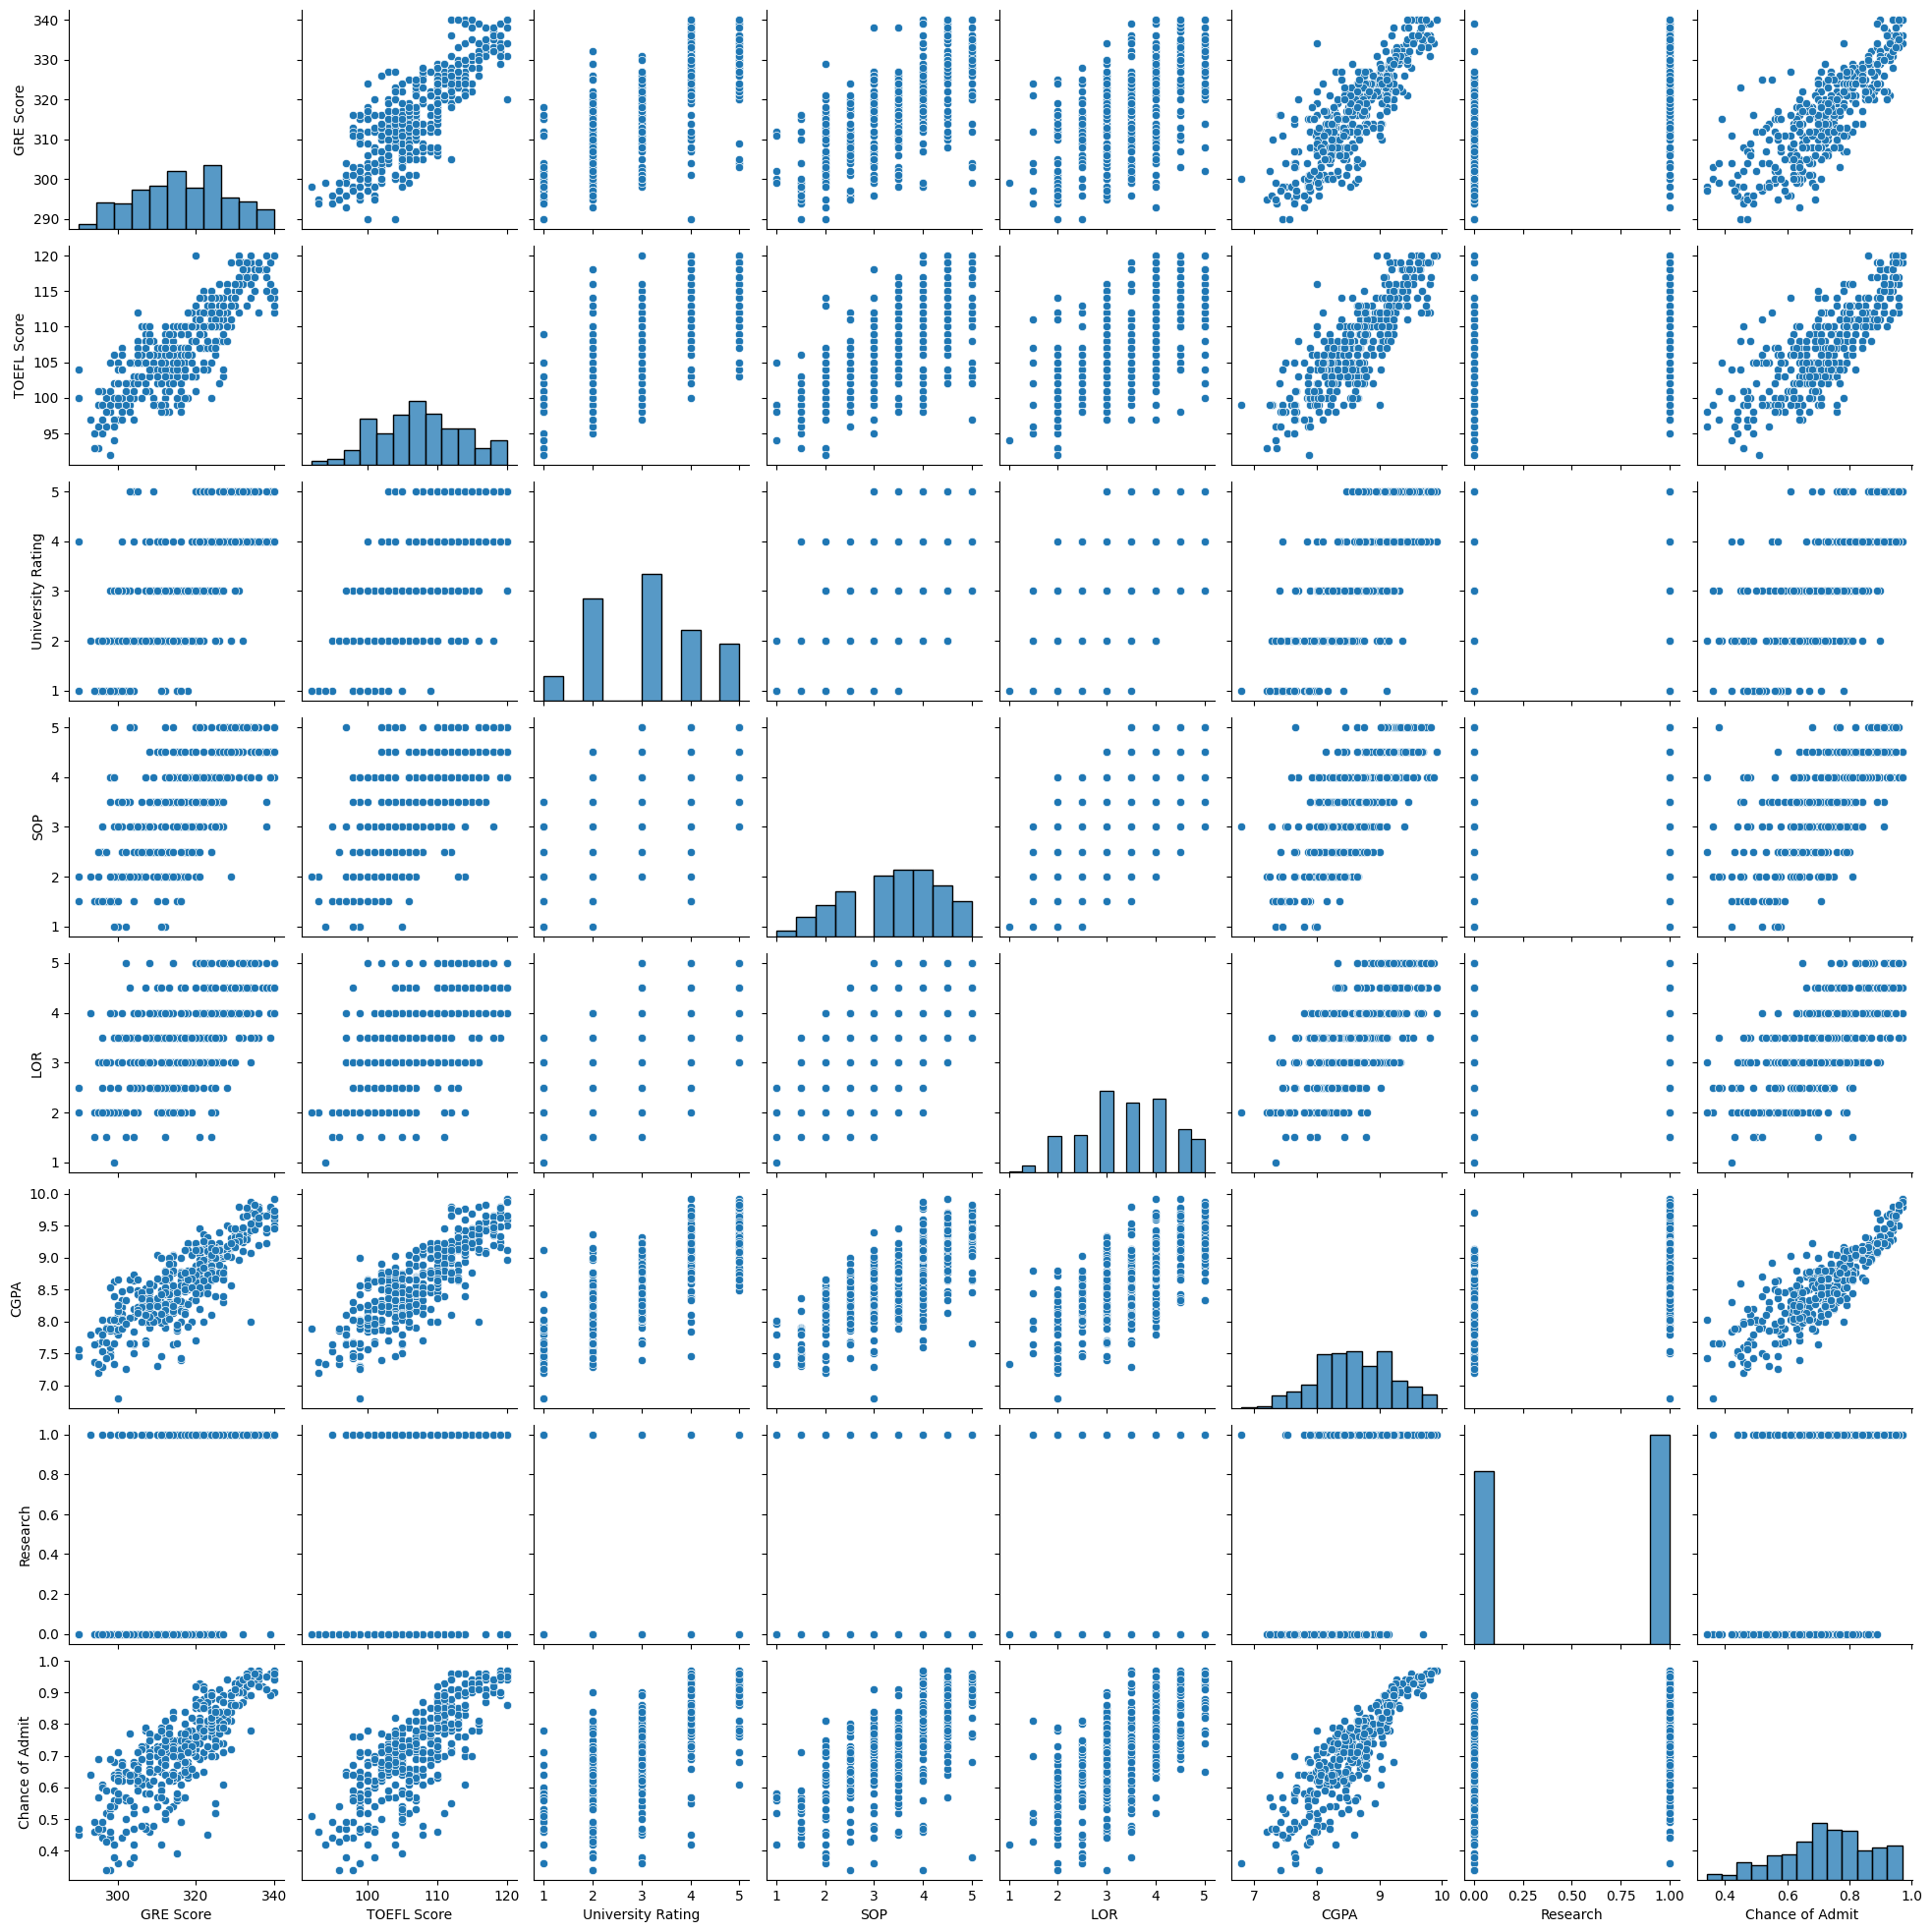

In [68]:
sns.pairplot(df)

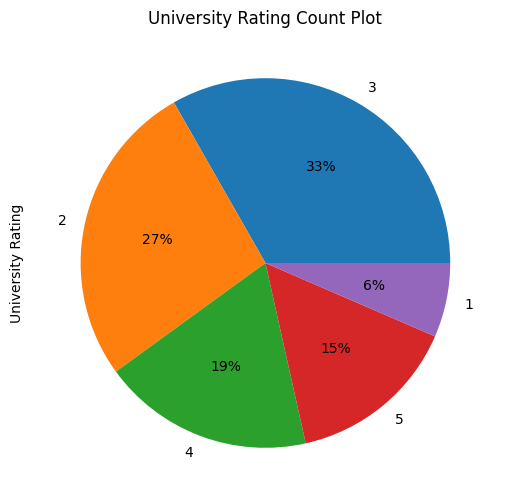

In [69]:
df['University Rating'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(8,6),
                                            title="University Rating Count Plot")
plt.show()

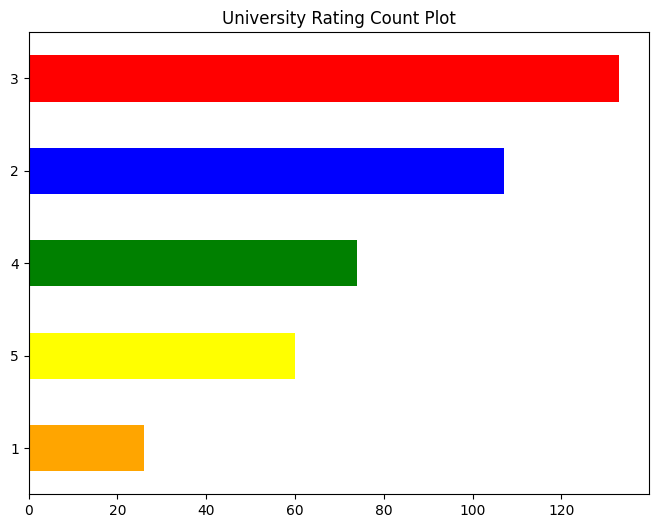

In [70]:
df['University Rating'].value_counts().sort_values().plot(kind='barh',figsize=(8,6),
                                            title="University Rating Count Plot",
                                                          color=["orange","yellow","green","blue","red"])
plt.show()

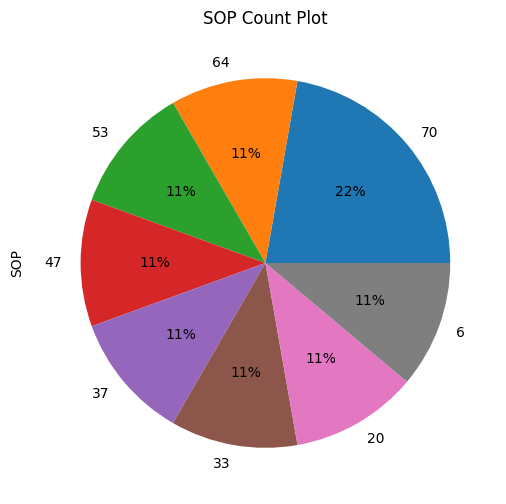

In [71]:
df.SOP.value_counts().value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(8,6),
                                            title="SOP Count Plot")
plt.show()

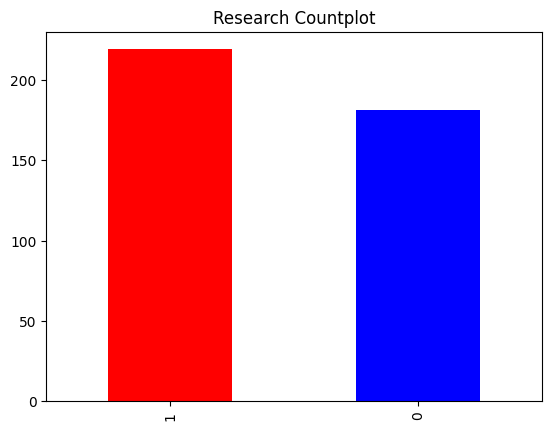

In [72]:
df.Research.value_counts().plot(kind='bar',title="Research Countplot",color=["red","blue"])
plt.show()

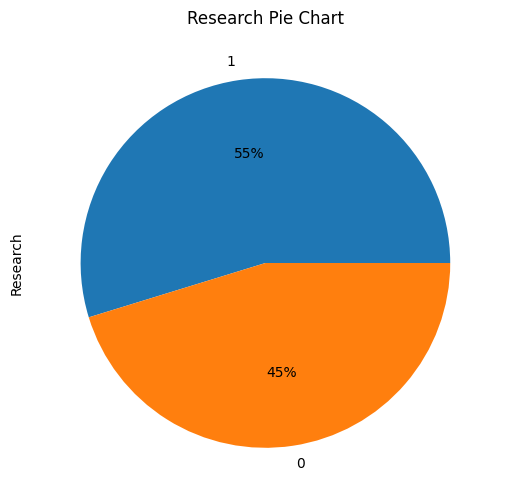

In [73]:
df.Research.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(8,6) , title="Research Pie Chart")
plt.show()

In [74]:
print(df.corr())

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.835977           0.668976  0.612831   
TOEFL Score         0.835977     1.000000           0.695590  0.657981   
University Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
Research            0.580391     0.489858           0.447783  0.444029   
Chance of Admit     0.802610     0.791594           0.711250  0.675732   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.557555  0.833060  0.580391          0.802610  
TOEFL Score        0.567721  0.828417  0.489858          0.791594  
University Rating  0.660123  0.746479  0.447783          0.711250  
SOP                0.729593  0.718144  0.444029          0.67

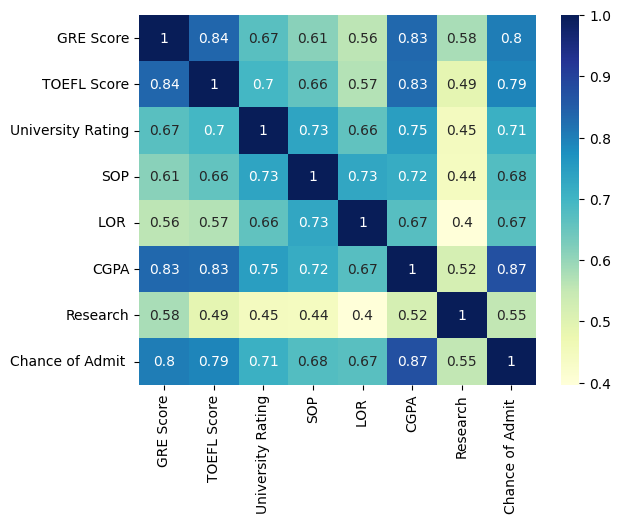

In [75]:
# print(data.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

Here from the above graph we can see that there is a correlation between GRE,TOFEL,CGPA and Chance of Admit

**checking for null value**s 

In [76]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There is no null values

**checking for outliers**

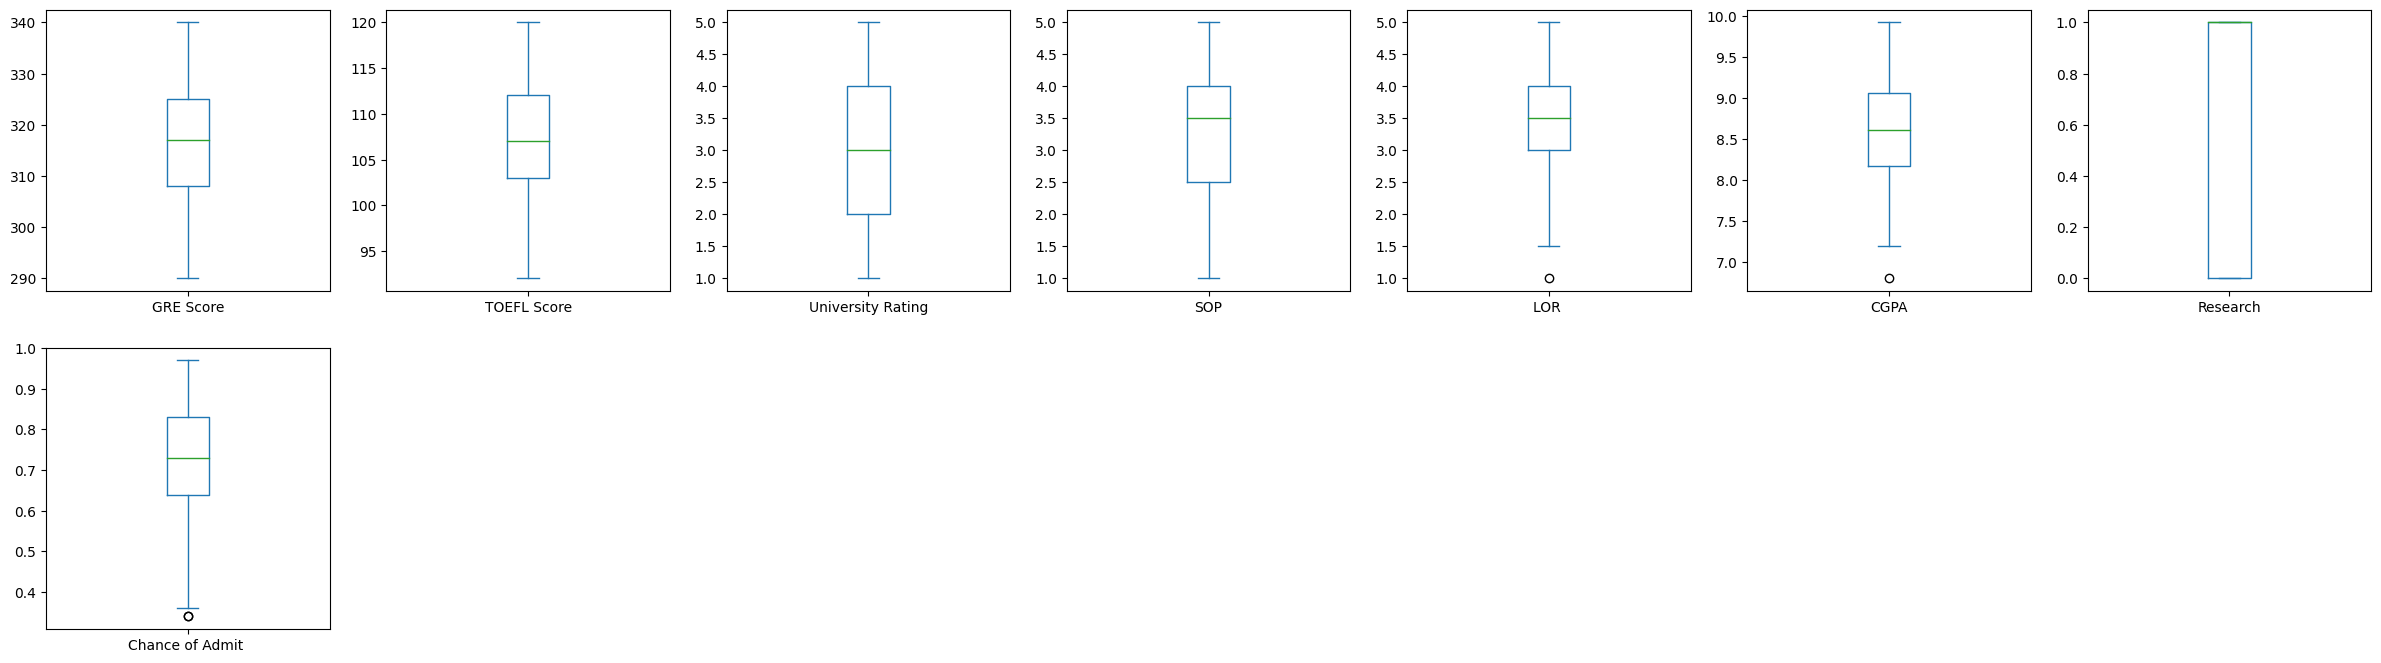

In [77]:
#to plot the outliers
import matplotlib.pyplot as plt
df.plot(kind='box',subplots=True,layout=(7,7),figsize=(30,30))
plt.show()

There are no outliers

**MODEL BUILDING**

In [78]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [79]:
X=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 7)
(80, 7)
(320,)
(80,)


# **Linear Regression**

In [82]:

lr= LinearRegression()  
lr.fit(X_train, y_train)  

LinearRegression()

In [83]:
trainpreds=lr.predict(X_train)
testpreds=lr.predict(X_test)

In [84]:
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#print(accuracy_score(y_train,trainpreds))
#print(accuracy_score(y_test,testpreds))
print(mean_squared_error(y_train,trainpreds))
print(mean_squared_error(y_test,testpreds))
print(mean_absolute_error(y_train,trainpreds))
print(mean_absolute_error(y_test,testpreds))
print(r2_score(y_train,trainpreds))
print(r2_score(y_test,testpreds))
a=mean_squared_error(y_train,trainpreds)
b=mean_squared_error(y_test,testpreds)
print("root_meansqre_err =", math.sqrt(a))
print("root_meansqre_err =", math.sqrt(b))

0.0040836328726812695
0.0036928815824289695
0.04568830794799143
0.04261381882403003
0.7981798784416263
0.8001063801904391
root_meansqre_err = 0.06390330877725557
root_meansqre_err = 0.06076908410062611


model performance was good i.e 80% on train as well as test.It is not overfitted or underfitted

# DecisionTreeRegressor

In [85]:
from sklearn.tree import export_graphviz, DecisionTreeRegressor #importing decisiontree regressor

In [86]:
dt = DecisionTreeRegressor(random_state = 0) 
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [87]:

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

In [88]:
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#print(accuracy_score(y_train,trainpreds))
#print(accuracy_score(y_test,testpreds))
print(mean_squared_error(y_train,y_pred_train))
print(mean_squared_error(y_test,y_pred_test))
print(mean_absolute_error(y_train,y_pred_train))
print(mean_absolute_error(y_test,y_pred_test))
print(r2_score(y_train,y_pred_train))
print(r2_score(y_test,y_pred_test))
a=mean_squared_error(y_train,y_pred_train)
b=mean_squared_error(y_test,y_pred_test)
print("root_meansqre_err =", math.sqrt(a))
print("root_meansqre_err =", math.sqrt(b))

4.237045877651919e-34
0.010395
3.816391647148976e-18
0.0775
1.0
0.4373244493386481
root_meansqre_err = 2.0584085788909643e-17
root_meansqre_err = 0.10195587280779857


# DecisionTreeRegressor_GridsearchCV

In [89]:
param_grid = {'max_depth' : range(1,10), 
              'min_impurity_decrease' : [0.0001, 0.01]}
#A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

In [90]:
dt=DecisionTreeRegressor()
gdt = GridSearchCV(estimator=dt, param_grid=param_grid, cv= 3)

In [91]:
gdt.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'min_impurity_decrease': [0.0001, 0.01]})

In [92]:
ypred_dt=gdt.predict(X_train)
y_pred_dt=gdt.predict(X_test)

In [93]:
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#print(accuracy_score(y_train,trainpreds))
#print(accuracy_score(y_test,testpreds))
print(mean_squared_error(y_train,ypred_dt))
print(mean_squared_error(y_test,y_pred_dt))
print(mean_absolute_error(y_train,ypred_dt))
print(mean_absolute_error(y_test,y_pred_dt))
print(r2_score(y_train,ypred_dt))
print(r2_score(y_test,y_pred_dt))
a=mean_squared_error(y_train,ypred_dt)
b=mean_squared_error(y_test,y_pred_dt)
print("root_meansqre_err =", math.sqrt(a))
print("root_meansqre_err =", math.sqrt(b))

0.004665481218362888
0.005660719258814733
0.050180753434886496
0.05554187393887951
0.7694239379555021
0.6935884246182876
root_meansqre_err = 0.06830432796216421
root_meansqre_err = 0.07523775155342385


# RandomForestRegressor_gridsearch

In [94]:
param_grid = {"n_estimators" : [100,200],
              "min_samples_split": [2, 5],
              "max_depth": [3,4,5],
              "min_samples_leaf": [1, 5],
              "ccp_alpha":[0.0001,0.01]
             }

In [95]:
rc=RandomForestRegressor()

In [96]:
# #calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [97]:
rfclf_grid = GridSearchCV(rc, param_grid, cv=3,verbose=1)

In [98]:
#%%time
rfclf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0.0001, 0.01], 'max_depth': [3, 4, 5],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=1)

In [99]:
ypred=rfclf_grid.predict(X_train)
y_pred=rfclf_grid.predict(X_test)

In [100]:
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#print(accuracy_score(y_train,trainpreds))
#print(accuracy_score(y_test,testpreds))
print(mean_squared_error(y_train,ypred))
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_train,ypred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_train,ypred))
print(r2_score(y_test,y_pred))
a=mean_squared_error(y_train,ypred)
b=mean_squared_error(y_test,y_pred)
print("root_meansqre_err =", math.sqrt(a))
print("root_meansqre_err =", math.sqrt(b))

0.0036586352547008467
0.004196239878040006
0.04349855840924034
0.047889593835578434
0.8191839876740291
0.7728598764710645
root_meansqre_err = 0.06048665352539225
root_meansqre_err = 0.06477839051751753


# GradientBoostingRegressor

In [101]:
gradient = GradientBoostingRegressor(n_estimators=100)


In [102]:

gradient.fit(X_train,y_train)

GradientBoostingRegressor()

In [103]:
ypred_gb=gradient.predict(X_train)
y_pred_gb=gradient.predict(X_test)

In [104]:
from  math import sqrt
rmse_train2 = sqrt(mean_squared_error(y_train, ypred_gb))
rmse_test2 = sqrt(mean_squared_error(y_test, y_pred_gb))

In [105]:
print(f'train RMSE : {rmse_train2}')
print(f'test RMSE : {rmse_test2}')

train RMSE : 0.040982274459683964
test RMSE : 0.06669491637868522


In [106]:
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#print(accuracy_score(y_train,trainpreds))
#print(accuracy_score(y_test,testpreds))
print(mean_squared_error(y_train,ypred_gb))
print(mean_squared_error(y_test,y_pred_gb))
print(mean_absolute_error(y_train,ypred_gb))
print(mean_absolute_error(y_test,y_pred_gb))
print(r2_score(y_train,ypred_gb))
print(r2_score(y_test,y_pred_gb))
a=mean_squared_error(y_train,ypred_gb)
b=mean_squared_error(y_test,y_pred_gb)
print("root_meansqre_err =", math.sqrt(a))
print("root_meansqre_err =", math.sqrt(b))

0.0016795468198888643
0.004448211870759814
0.028620852886782157
0.04815564894671517
0.9169939233223997
0.7592207730795439
root_meansqre_err = 0.040982274459683964
root_meansqre_err = 0.06669491637868522


# XGBRegressor

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor



In [108]:
# create an xgboost regression model
xgb = XGBRegressor( n_estimators=1000,max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
#learning_rate (alias: eta ): it is a regularization parameter that shrinks feature weights in each boosting step
#70% of the observations would be randomly sampled to be used in each boosting iteration
#colsample_bytree - random subsample of columns when new tree is created.

In [109]:


xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [110]:
ypred_xgb=xgb.predict(X_train)
y_pred_xgb=xgb.predict(X_test)

In [111]:
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#print(accuracy_score(y_train,trainpreds))
#print(accuracy_score(y_test,testpreds))
print(mean_squared_error(y_train,ypred_xgb))
print(mean_squared_error(y_test,y_pred_xgb))
print(mean_absolute_error(y_train,ypred_xgb))
print(mean_absolute_error(y_test,y_pred_xgb))
print(r2_score(y_train,ypred_xgb))
print(r2_score(y_test,y_pred_xgb))
a=mean_squared_error(y_train,ypred_xgb)
b=mean_squared_error(y_test,y_pred_xgb)
print("root_meansqre_err =", math.sqrt(a))
print("root_meansqre_err =", math.sqrt(b))

4.942330255435346e-07
0.005536189650094055
0.0005396714843809594
0.052135020256042476
0.9999755741584997
0.7003291428636509
root_meansqre_err = 0.0007030170876611284
root_meansqre_err = 0.07440557539656592


# **conclusion**

Among all the algorithmns Linear regression and Decision tree with Grid Search Performed well.

In [113]:
import pickle

In [121]:
pickle.dump(lr,open("model.pkl","wb"))